In [3]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [4]:
census = pd.read_csv("https://ibm.box.com/shared/static/05c3415cbfbtfnr2fx4atenb2sd361ze.csv")

In [73]:
census.iloc[:,7]

0     23939
1     23040
2     35787
3     37524
4     57123
5     60058
6     71551
7     88669
8     40959
9     32875
10    27751
11    44164
12    26576
13    21323
14    24336
15    27249
16    26282
17    22014
18    15461
19    15089
20    20039
21    31908
22    13781
23    43198
24    15957
25    10934
26    12961
27    44689
28    12034
29    10402
      ...  
48    17949
49    20588
50    14685
51    17104
52    16563
53     8201
54    22677
55    26353
56    16134
57    13089
58    16954
59    22694
60    12765
61    15754
62    12171
63    25113
64    16907
65    13231
66    11317
67    11888
68    17285
69    23482
70    15528
71    39523
72    19713
73    34381
74    27149
75    25828
76    33385
77    28202
Name: PER_CAPITA_INCOME , Length: 78, dtype: int64

KeyError: '0'

In [6]:
sch = pd.read_csv("https://ibm.box.com/shared/static/f9gjvj1gjmxxzycdhplzt01qtz0s7ew7.csv")

In [7]:
sch.head()

School ID                                     NAME_OF_SCHOOL  \
0     610038                  Abraham Lincoln Elementary School   
1     610281  Adam Clayton Powell Paideia Community Academy ...   
2     610185                Adlai E Stevenson Elementary School   
3     609993                    Agustin Lara Elementary Academy   
4     610513                      Air Force Academy High School   

  Elementary, Middle, or High School          Street Address     City State  \
0                                 ES        615 W Kemper Pl   Chicago    IL   
1                                 ES  7511 S South Shore Dr   Chicago    IL   
2                                 ES     8010 S Kostner Ave   Chicago    IL   
3                                 ES     4619 S Wolcott Ave   Chicago    IL   
4                                 HS        3630 S Wells St   Chicago    IL   

   ZIP Code    Phone Number  \
0     60614  (773) 534-5720   
1     60649  (773) 535-6650   
2     60652  (773) 535-2280   
3     60609  (773) 535-4389   
4     60609  (773) 535-1590   

                                               Link   \
0  http://schoolreports.cps.edu/SchoolProgressRep...   
1  http://schoolreports.cps.edu/SchoolProgressRep...   
2  http://schoolreports.cps.edu/SchoolProgressRep...   
3  http://schoolreports.cps.edu/SchoolProgressRep...   
4  http://schoolreports.cps.edu/SchoolProgressRep...   

                      Network Manager  ... Freshman on Track Rate %  \
0        Fullerton Elementary Network  ...                      NDA   
1           Skyway Elementary Network  ...                      NDA   
2           Midway Elementary Network  ...                      NDA   
3         Pershing Elementary Network  ...                      NDA   
4  Southwest Side High School Network  ...                     91.8   

  X_COORDINATE Y_COORDINATE   Latitude  Longitude COMMUNITY_AREA_NUMBER  \
0  1171699.458  1915829.428  41.924497 -87.644522                     7   
1  1196129.985  1856209.466  41.760324 -87.556736                    43   
2  1148427.165  1851012.215  41.747111 -87.731702                    70   
3  1164504.290  1873959.199  41.809757 -87.672145                    61   
4  1175177.622  1880745.126  41.828146 -87.632794                    34   

  COMMUNITY_AREA_NAME  Ward Police District                     Location  
0        LINCOLN PARK    43              18  (41.92449696, -87.64452163)  
1         SOUTH SHORE     7               4  (41.76032435, -87.55673627)  
2             ASHBURN    13               8  (41.74711093, -87.73170248)  
3            NEW CITY    20               9    (41.8097569, -87.6721446)  
4       ARMOUR SQUARE    11               9  (41.82814609, -87.63279369)  

[5 rows x 78 columns]

In [8]:
crime = pd.read_csv("https://ibm.box.com/shared/static/svflyugsr9zbqy5bmowgswqemfpm1x7f.csv")

In [9]:
crime.head()

ID CASE_NUMBER                    DATE                     BLOCK  \
0   3512276    HK587712  08/28/2004 05:50:56 PM        047XX S KEDZIE AVE   
1   3406613    HK456306  06/26/2004 12:40:00 PM  009XX N CENTRAL PARK AVE   
2   8002131    HT233595  04/04/2011 05:45:00 AM        043XX S WABASH AVE   
3   7903289    HT133522  12/30/2010 04:30:00 PM      083XX S KINGSTON AVE   
4  10402076    HZ138551  02/02/2016 07:30:00 PM           033XX W 66TH ST   

  IUCR PRIMARY_TYPE                    DESCRIPTION  \
0  890        THEFT                  FROM BUILDING   
1  820        THEFT                 $500 AND UNDER   
2  820        THEFT                 $500 AND UNDER   
3  840        THEFT  FINANCIAL ID THEFT: OVER $300   
4  820        THEFT                 $500 AND UNDER   

           LOCATION_DESCRIPTION  ARREST  DOMESTIC  ...  WARD  \
0            SMALL RETAIL STORE   False     False  ...  14.0   
1                         OTHER   False     False  ...  27.0   
2  NURSING HOME/RETIREMENT HOME   False     False  ...   3.0   
3                     RESIDENCE   False     False  ...   7.0   
4                         ALLEY   False     False  ...  15.0   

   COMMUNITY_AREA_NUMBER  FBICODE  X_COORDINATE Y_COORDINATE  YEAR  \
0                   58.0        6     1155838.0    1873050.0  2004   
1                   23.0        6     1152206.0    1906127.0  2004   
2                   38.0        6     1177436.0    1876313.0  2011   
3                   46.0        6     1194622.0    1850125.0  2010   
4                   66.0        6     1155240.0    1860661.0  2016   

                UPDATEDON   LATITUDE  LONGITUDE                       LOCATION  
0  02/10/2018 03:50:01 PM  41.807441 -87.703956    (41.8074405, -87.703955849)  
1  02/28/2018 03:56:25 PM  41.898280 -87.716406  (41.898279962, -87.716405505)  
2  02/10/2018 03:50:01 PM  41.815933 -87.624642  (41.815933131, -87.624642127)  
3  02/10/2018 03:50:01 PM  41.743665 -87.562463  (41.743665322, -87.562462756)  
4  02/10/2018 03:50:01 PM  41.773455 -87.706480  (41.773455295, -87.706480471)  

[5 rows x 22 columns]

In [10]:
community = sch[['COMMUNITY_AREA_NUMBER', 'COMMUNITY_AREA_NAME']].drop_duplicates()
community.dtypes

COMMUNITY_AREA_NUMBER     int64
COMMUNITY_AREA_NAME      object
dtype: object

In [93]:
loc = crime[['COMMUNITY_AREA_NUMBER','LATITUDE','LONGITUDE']].drop_duplicates()
loc

COMMUNITY_AREA_NUMBER   LATITUDE  LONGITUDE
0                     58.0  41.807441 -87.703956
1                     23.0  41.898280 -87.716406
2                     38.0  41.815933 -87.624642
3                     46.0  41.743665 -87.562463
4                     66.0  41.773455 -87.706480
5                     24.0  41.896447 -87.644939
6                     14.0  41.972845 -87.708600
7                     38.0  41.823880 -87.613504
8                     72.0  41.711281 -87.689179
9                     21.0  41.939296 -87.710923
10                    65.0  41.754593 -87.741529
11                    28.0  41.865761 -87.646876
12                    49.0  41.697154 -87.641316
13                    28.0  41.868243 -87.639224
14                    26.0  41.872584 -87.721786
15                    22.0  41.929744 -87.684274
16                    48.0  41.732731 -87.585114
17                    44.0  41.750772 -87.624538
18                    25.0  41.875659 -87.762569
19                    25.0  41.869174 -87.770182
20                     8.0  41.897983 -87.624096
21                    32.0  41.881598 -87.627758
22                    69.0  41.769204 -87.622440
23                    59.0  41.827374 -87.682568
24                    68.0  41.785123 -87.644917
25                    14.0  41.961845 -87.731029
26                    76.0  41.976290 -87.905227
27                    66.0  41.773204 -87.683479
28                    73.0  41.704455 -87.642757
29                    44.0  41.750102 -87.637929
..                     ...        ...        ...
501                   29.0  41.859855 -87.733544
502                   70.0  41.754674 -87.685410
503                   43.0  41.756551 -87.552952
504                   68.0  41.790212 -87.645053
505                   20.0  41.921575 -87.736464
507                   12.0  41.975280 -87.752144
508                   61.0  41.804338 -87.643989
509                   19.0  41.922537 -87.774454
510                   67.0  41.791699 -87.669379
511                   27.0  41.872791 -87.704648
512                    8.0  41.907123 -87.639681
513                   66.0  41.765721 -87.689390
514                    7.0  41.926269 -87.640899
515                   48.0  41.725301 -87.584966
516                   54.0  41.653711 -87.609529
517                   53.0  41.679809 -87.625870
518                   58.0  41.812995 -87.698029
519                   45.0  41.746013 -87.586371
520                   25.0  41.874908 -87.750249
521                   45.0  41.736930 -87.584391
522                   16.0  41.950983 -87.710383
523                   70.0  41.745980 -87.713190
524                   25.0  41.894734 -87.773638
525                   71.0  41.756097 -87.644487
526                   11.0  41.979595 -87.758821
527                    8.0  41.900738 -87.634361
528                   46.0  41.751885 -87.554826
529                   28.0  41.874363 -87.643013
530                   71.0  41.746852 -87.653941
531                   23.0  41.897895 -87.728622

[483 rows x 3 columns]

In [11]:
crime.dropna(inplace=True)
crime = crime.apply(pd.to_numeric, errors='ignore')
crime.dtypes

ID                         int64
CASE_NUMBER               object
DATE                      object
BLOCK                     object
IUCR                      object
PRIMARY_TYPE              object
DESCRIPTION               object
LOCATION_DESCRIPTION      object
ARREST                      bool
DOMESTIC                    bool
BEAT                       int64
DISTRICT                   int64
WARD                     float64
COMMUNITY_AREA_NUMBER    float64
FBICODE                   object
X_COORDINATE             float64
Y_COORDINATE             float64
YEAR                       int64
UPDATEDON                 object
LATITUDE                 float64
LONGITUDE                float64
LOCATION                  object
dtype: object

In [12]:
grouped = crime
grouped = grouped.groupby('COMMUNITY_AREA_NUMBER', as_index=False)['COMMUNITY_AREA_NUMBER'].agg({"Count":"count"})

In [13]:
df_grouped = pd.merge(grouped, 
                      community,
                      how='left',
                      on = ['COMMUNITY_AREA_NUMBER']).drop(['COMMUNITY_AREA_NUMBER'], axis=1)

In [14]:
df_grouped

Count     COMMUNITY_AREA_NAME
0       6             ROGERS PARK
1       7              WEST RIDGE
2       4                  UPTOWN
3       3          LINCOLN SQUARE
4       4            NORTH CENTER
5      11               LAKE VIEW
6       5            LINCOLN PARK
7      15         NEAR NORTH SIDE
8       3            NORWOOD PARK
9       2          JEFFERSON PARK
10      1             FOREST GLEN
11      5             ALBANY PARK
12      5            PORTAGE PARK
13      8             IRVING PARK
14      3                 DUNNING
15      2               MONTCLARE
16      8          BELMONT CRAGIN
17      3                 HERMOSA
18      6                AVONDALE
19      9            LOGAN SQUARE
20     21           HUMBOLDT PARK
21     13               WEST TOWN
22     42                  AUSTIN
23     10      WEST GARFIELD PARK
24      8      EAST GARFIELD PARK
25     16          NEAR WEST SIDE
26     16          NORTH LAWNDALE
27      8          SOUTH LAWNDALE
28      9         LOWER WEST SIDE
29      7                    LOOP
..    ...                     ...
40      9           SOUTH CHICAGO
41      1                BURNSIDE
42      5         CALUMET HEIGHTS
43     11                ROSELAND
44      3                 PULLMAN
45      4           SOUTH DEERING
46      2               EAST SIDE
47      6            WEST PULLMAN
48      2               RIVERDALE
49      1               HEGEWISCH
50      2          GARFIELD RIDGE
51     10           BRIGHTON PARK
52      2           MCKINLEY PARK
53      1              BRIDGEPORT
54     10                NEW CITY
55      4             WEST ELSDON
56      7               GAGE PARK
57      2                CLEARING
58      3               WEST LAWN
59     12            CHICAGO LAWN
60     12          WEST ENGLEWOOD
61     21               ENGLEWOOD
62     11  GREATER GRAND CROSSING
63      8                 ASHBURN
64     14          AUBURN GRESHAM
65      4                 BEVERLY
66      3      WASHINGTON HEIGHTS
67      1             MORGAN PARK
68      4                   OHARE
69      2               EDGEWATER

[70 rows x 2 columns]

In [15]:
# sort dataframe on 'Count' column (descending) and get top 10 and bottom 10
df_order = df_grouped.set_index(['COMMUNITY_AREA_NAME'])
df_order.sort_values(by='Count', ascending=False,inplace=True)

In [16]:
df_top10 = df_order.head(10)
df_bot10 = df_order.tail(10)

In [17]:
df_top10

Count
COMMUNITY_AREA_NAME       
AUSTIN                  42
ENGLEWOOD               21
HUMBOLDT PARK           21
NEAR WEST SIDE          16
NORTH LAWNDALE          16
NEAR NORTH SIDE         15
AUBURN GRESHAM          14
WEST TOWN               13
CHICAGO LAWN            12
WEST ENGLEWOOD          12

In [18]:
df_bot10

Count
COMMUNITY_AREA_NAME       
FULLER PARK              2
MONTCLARE                2
JEFFERSON PARK           2
EDGEWATER                2
BRIDGEPORT               1
HEGEWISCH                1
BURNSIDE                 1
NEAR SOUTH SIDE          1
FOREST GLEN              1
MORGAN PARK              1

In [19]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


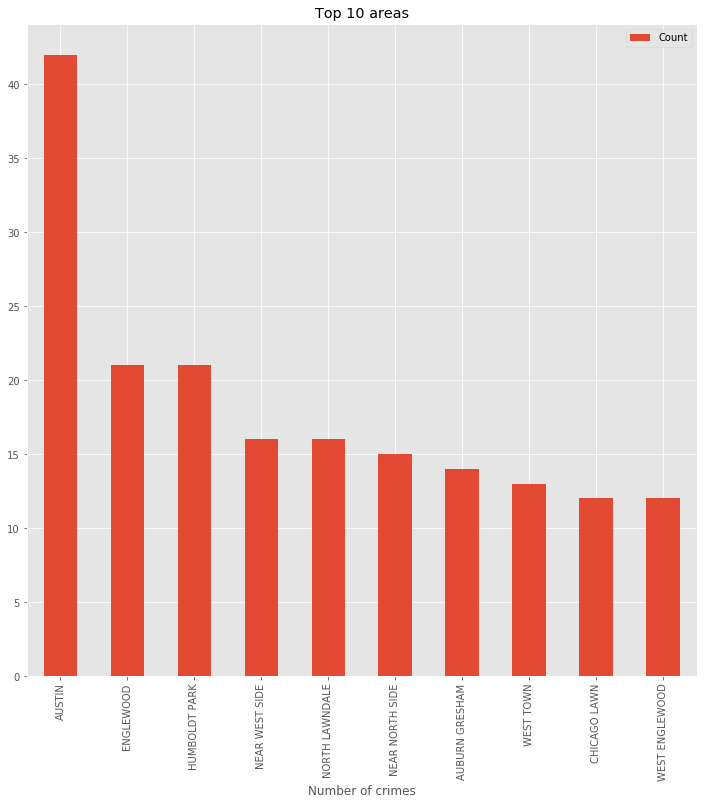

In [27]:
df_top10.plot(kind='bar', figsize=(12, 12))
plt.xlabel('Number of crimes')
plt.title('Top 10 areas')
plt.show()

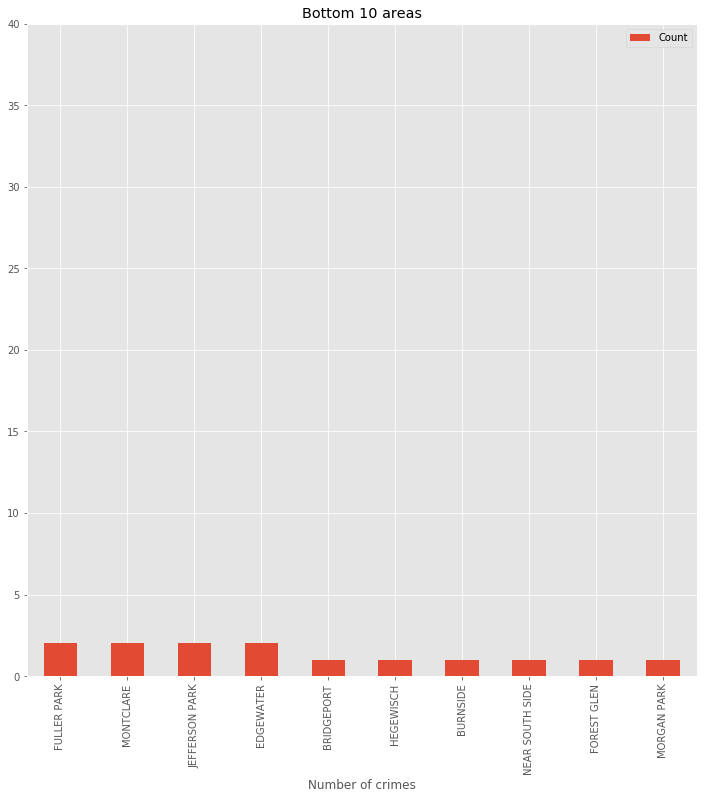

In [20]:
df_bot10.plot(kind='bar', figsize=(12, 12))
plt.ylim(0,40)
plt.xlabel('Number of crimes')
plt.title('Bottom 10 areas')
plt.show()

In [21]:
!conda install -c conda-forge geopy --yes

Solving environment: done

# All requested packages already installed.



In [22]:
from geopy.geocoders import Nominatim

In [23]:
# Visualize crime number in the map
address = 'Chicago, US'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Chicago, US is {},{}.'.format(latitude,longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geographical coordinate of Chicago, US is 41.8755616,-87.6244212.


In [46]:
world_geo = r'world_countries.json'
chicago_map = folium.Map(location=[41.875,-87.624], width=1000, height=750, zoom_start = 12)

In [47]:
chicago_map

In [48]:
r = requests.get('https://data.cityofchicago.org/api/views/igwz-8jzy/rows.json?accessType=DOWNLOAD')

In [49]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
chicago_geo = r.json()
threshold_scale = np.linspace(df_grouped['Count'].min(),
                              df_grouped['Count'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

In [51]:
# let Folium determine the scale.
chicago_map.choropleth(
    geo_data=chicago_geo,
    data=df_grouped,
    columns=['COMMUNITY_AREA_NAME','Count'],
    key_on='feature.properties.COMMUNITY_AREA_NAME',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime in Chicago',
    reset=True
)
chicago_map

In [53]:
df_group_index = pd.merge(grouped, 
                      community,
                      how='left',
                      on = ['COMMUNITY_AREA_NUMBER'])

In [55]:
df_group_2 = pd.merge(df_group_index, 
                      census,
                      how='left',
                      on = ['COMMUNITY_AREA_NUMBER'])

In [56]:
df_group_2.head()

COMMUNITY_AREA_NUMBER  Count COMMUNITY_AREA_NAME_x COMMUNITY_AREA_NAME_y  \
0                    1.0      6           ROGERS PARK           Rogers Park   
1                    2.0      7            WEST RIDGE            West Ridge   
2                    3.0      4                UPTOWN                Uptown   
3                    4.0      3        LINCOLN SQUARE        Lincoln Square   
4                    5.0      4          NORTH CENTER          North Center   

   PERCENT OF HOUSING CROWDED  PERCENT HOUSEHOLDS BELOW POVERTY  \
0                         7.7                              23.6   
1                         7.8                              17.2   
2                         3.8                              24.0   
3                         3.4                              10.9   
4                         0.3                               7.5   

   PERCENT AGED 16+ UNEMPLOYED  PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  \
0                          8.7                                          18.2   
1                          8.8                                          20.8   
2                          8.9                                          11.8   
3                          8.2                                          13.4   
4                          5.2                                           4.5   

   PERCENT AGED UNDER 18 OR OVER 64  PER_CAPITA_INCOME   HARDSHIP_INDEX  
0                              27.5               23939            39.0  
1                              38.5               23040            46.0  
2                              22.2               35787            20.0  
3                              25.5               37524            17.0  
4                              26.2               57123             6.0

In [75]:
df_group_2.iloc[:,9].head()

0    23939
1    23040
2    35787
3    37524
4    57123
Name: PER_CAPITA_INCOME , dtype: int64

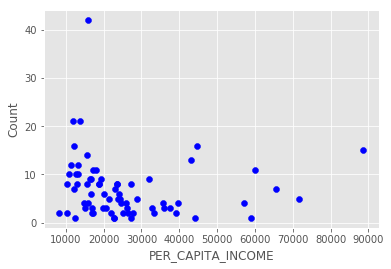

In [76]:
plt.scatter(df_group_2.iloc[:,9],df_group_2['Count'],color='blue')
plt.xlabel("PER_CAPITA_INCOME")
plt.ylabel("Count")
plt.show()

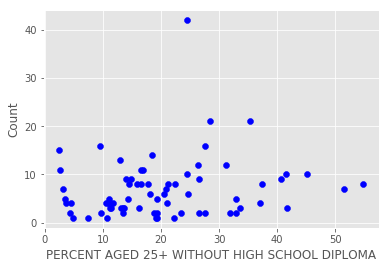

In [81]:
plt.scatter(df_group_2['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'],df_group_2['Count'],color='blue')
plt.xlabel("PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA")
plt.ylabel("Count")
plt.show()

In [82]:
CLIENT_ID = 'O4EYKTFHHGSSTAJ3SVU25LZC3TF04MFO3XIK4ZFXJUDXU5DT' # your Foursquare ID
CLIENT_SECRET = '20TNU3NVD3JEJX3MGGSGI2AD2E0UBEP204VK1VWH3UOK40YL' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100

In [83]:
#Get location of Community of TOP 1 crime rate
latitude = 41.869174
longitude = -87.770182

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of AUSTIN are 30.2711286, -97.7436995.


In [91]:
#Get location of least crime community
print(df_group_2[df_group_2['COMMUNITY_AREA_NAME_x'] == 'BURNSIDE'])

    COMMUNITY_AREA_NUMBER  Count COMMUNITY_AREA_NAME_x COMMUNITY_AREA_NAME_y  \
41                   47.0      1              BURNSIDE              Burnside   

    PERCENT OF HOUSING CROWDED  PERCENT HOUSEHOLDS BELOW POVERTY  \
41                         6.8                              33.0   

    PERCENT AGED 16+ UNEMPLOYED  PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  \
41                         18.6                                          19.3   

    PERCENT AGED UNDER 18 OR OVER 64  PER_CAPITA_INCOME   HARDSHIP_INDEX  
41                              42.7               12515            79.0  


In [94]:
print(loc[loc['COMMUNITY_AREA_NUMBER'] == 47.0])

     COMMUNITY_AREA_NUMBER   LATITUDE  LONGITUDE
248                   47.0  41.732331 -87.596234


In [85]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [86]:
austin_venues = getNearbyVenues(names=['Austin'],
                                   latitudes=[41.869174],
                                   longitudes=[-87.770182]
                                  )

Austin


In [87]:
austin_venues

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0        Austin              41.869174              -87.770182   
1        Austin              41.869174              -87.770182   
2        Austin              41.869174              -87.770182   
3        Austin              41.869174              -87.770182   
4        Austin              41.869174              -87.770182   
5        Austin              41.869174              -87.770182   
6        Austin              41.869174              -87.770182   
7        Austin              41.869174              -87.770182   
8        Austin              41.869174              -87.770182   
9        Austin              41.869174              -87.770182   
10       Austin              41.869174              -87.770182   
11       Austin              41.869174              -87.770182   
12       Austin              41.869174              -87.770182   
13       Austin              41.869174              -87.770182   
14       Austin              41.869174              -87.770182   
15       Austin              41.869174              -87.770182   
16       Austin              41.869174              -87.770182   
17       Austin              41.869174              -87.770182   
18       Austin              41.869174              -87.770182   
19       Austin              41.869174              -87.770182   
20       Austin              41.869174              -87.770182   
21       Austin              41.869174              -87.770182   
22       Austin              41.869174              -87.770182   
23       Austin              41.869174              -87.770182   
24       Austin              41.869174              -87.770182   
25       Austin              41.869174              -87.770182   
26       Austin              41.869174              -87.770182   
27       Austin              41.869174              -87.770182   
28       Austin              41.869174              -87.770182   
29       Austin              41.869174              -87.770182   
30       Austin              41.869174              -87.770182   
31       Austin              41.869174              -87.770182   
32       Austin              41.869174              -87.770182   
33       Austin              41.869174              -87.770182   
34       Austin              41.869174              -87.770182   
35       Austin              41.869174              -87.770182   
36       Austin              41.869174              -87.770182   
37       Austin              41.869174              -87.770182   
38       Austin              41.869174              -87.770182   

                                     Venue  Venue Latitude  Venue Longitude  \
0                 Stella Albano's Pizzeria       41.865373       -87.772230   
1                            Eastgate Cafe       41.872754       -87.776999   
2                   Oak Park Arts District       41.872761       -87.778657   
3                 Captain B's Shrimp House       41.865332       -87.765707   
4                      Chicago Studio City       41.868405       -87.767529   
5                        Bodhi Thai Bistro       41.865336       -87.779729   
6                                Buzz Cafe       41.872400       -87.779660   
7                              Barrie Park       41.869730       -87.779002   
8                                Lucky Dog       41.865260       -87.776216   
9                     Firehouse Restaurant       41.866325       -87.765791   
10                           Trattoria 225       41.872500       -87.780699   
11                                 Dunkin'       41.865184       -87.768860   
12                      MORA Asian Kitchen       41.872536       -87.779667   
13                                  Subway       41.865711       -87.765713   
14                     Val's Halla Records       41.872598       -87.781116   
15                          Brown Elephant       41.872520       -87.780253   
16                 

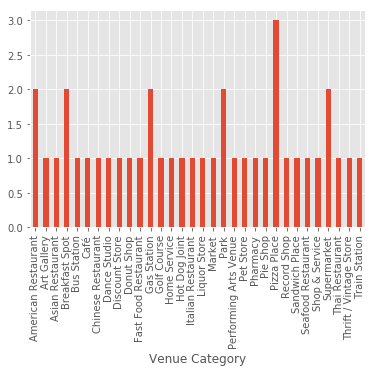

In [88]:
df = austin_venues.groupby(['Venue Category'])['Neighborhood'].count()

df.plot.bar()

In [89]:
df_group_2

COMMUNITY_AREA_NUMBER  Count   COMMUNITY_AREA_NAME_x  \
0                     1.0      6             ROGERS PARK   
1                     2.0      7              WEST RIDGE   
2                     3.0      4                  UPTOWN   
3                     4.0      3          LINCOLN SQUARE   
4                     5.0      4            NORTH CENTER   
5                     6.0     11               LAKE VIEW   
6                     7.0      5            LINCOLN PARK   
7                     8.0     15         NEAR NORTH SIDE   
8                    10.0      3            NORWOOD PARK   
9                    11.0      2          JEFFERSON PARK   
10                   12.0      1             FOREST GLEN   
11                   14.0      5             ALBANY PARK   
12                   15.0      5            PORTAGE PARK   
13                   16.0      8             IRVING PARK   
14                   17.0      3                 DUNNING   
15                   18.0      2               MONTCLARE   
16                   19.0      8          BELMONT CRAGIN   
17                   20.0      3                 HERMOSA   
18                   21.0      6                AVONDALE   
19                   22.0      9            LOGAN SQUARE   
20                   23.0     21           HUMBOLDT PARK   
21                   24.0     13               WEST TOWN   
22                   25.0     42                  AUSTIN   
23                   26.0     10      WEST GARFIELD PARK   
24                   27.0      8      EAST GARFIELD PARK   
25                   28.0     16          NEAR WEST SIDE   
26                   29.0     16          NORTH LAWNDALE   
27                   30.0      8          SOUTH LAWNDALE   
28                   31.0      9         LOWER WEST SIDE   
29                   32.0      7                    LOOP   
..                    ...    ...                     ...   
40                   46.0      9           SOUTH CHICAGO   
41                   47.0      1                BURNSIDE   
42                   48.0      5         CALUMET HEIGHTS   
43                   49.0     11                ROSELAND   
44                   50.0      3                 PULLMAN   
45                   51.0      4           SOUTH DEERING   
46                   52.0      2               EAST SIDE   
47                   53.0      6            WEST PULLMAN   
48                   54.0      2               RIVERDALE   
49                   55.0      1               HEGEWISCH   
50                   56.0      2          GARFIELD RIDGE   
51                   58.0     10           BRIGHTON PARK   
52                   59.0      2           MCKINLEY PARK   
53                   60.0      1              BRIDGEPORT   
54                   61.0     10                NEW CITY   
55                   62.0      4             WEST ELSDON   
56                   63.0      7               GAGE PARK   
57                   64.0      2                CLEARING   
58                   65.0      3               WEST LAWN   
59                   66.0     12            CHICAGO LAWN   
60                   67.0     12          WEST ENGLEWOOD   
61                   68.0     21               ENGLEWOOD   
62                   69.0     11  GREATER GRAND CROSSING   
63                   70.0      8                 ASHBURN   
64                   71.0     14          AUBURN GRESHAM   
65                   72.0      4                 BEVERLY   
66                   73.0      3      WASHINGTON HEIGHTS   
67                   75.0      1             MORGAN PARK   
68                   76.0      4                   OHARE   
69                   77.0      2               EDGEWATER   

     COMMUNITY_AREA_NAME_y  PERCENT OF HOUSING CROWDED  \
0              Rogers Park                         7.7   
1               West Ridge                         7.8   
2                   Uptown                         3.8   
3           Lincoln Square                         

In [95]:
burnside_venues = getNearbyVenues(names=['Burnside'],
                                   latitudes=[41.732331],
                                   longitudes=[-87.596234]
                                  )

Burnside


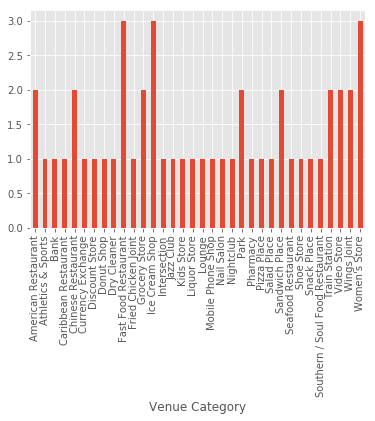

In [96]:
df_2 = burnside_venues.groupby(['Venue Category'])['Neighborhood'].count()

df_2.plot.bar()